In [7]:
using Flux3D, Makie
Makie.AbstractPlotting.set_theme!(show_axis = true, scale=false)
AbstractPlotting.inline!(true)

false

In [45]:
include("./julia/include/_topologyOptimization.jl")

Loaded Topology Optimization Library!


# Voxelization

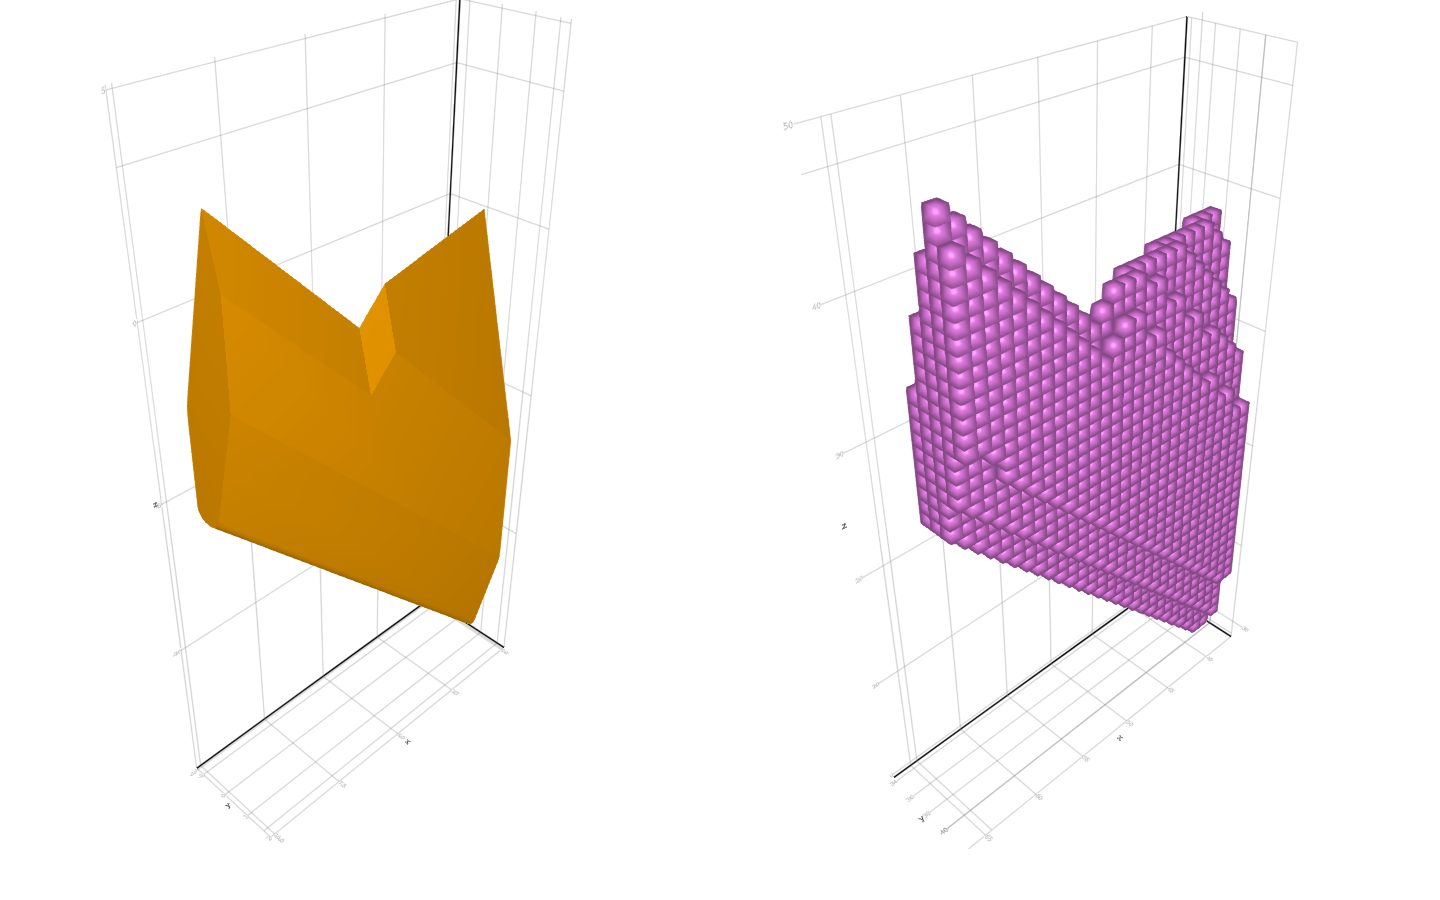

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135
┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


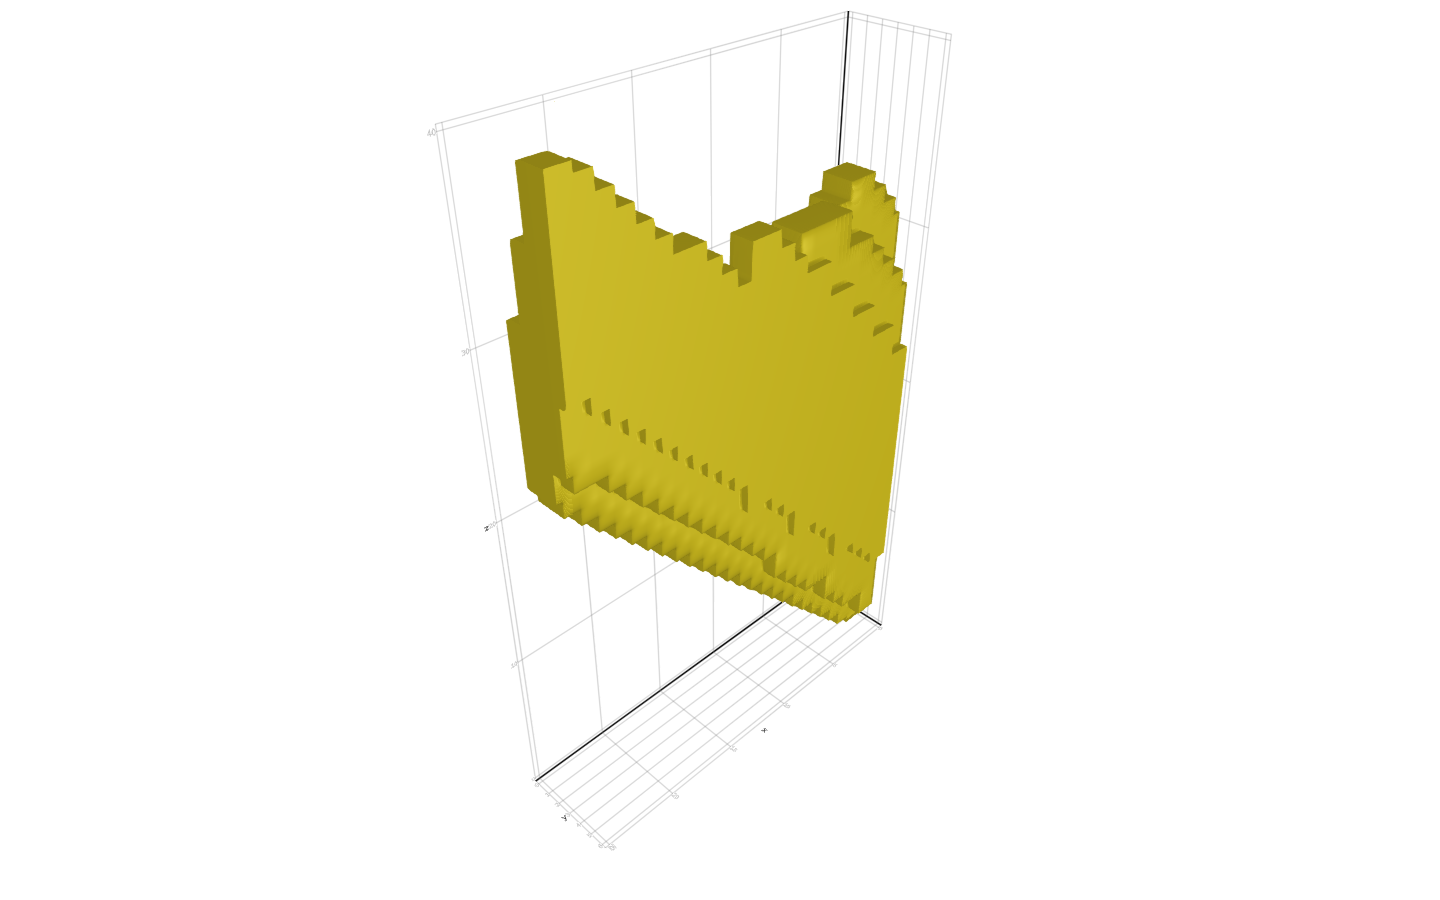

(25, 6, 40)

24.233333333333334

In [37]:
res=64
v=voxelize("wing_rot.obj",res);
display(size(v))
display(sum(v)/length(v)*100)

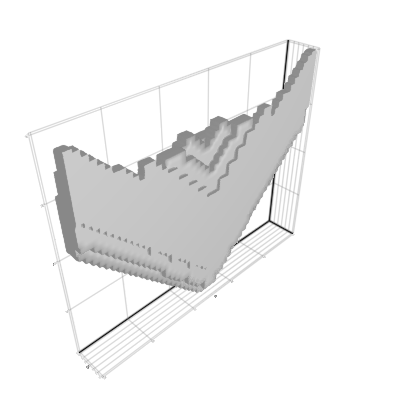

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


In [38]:
voxels=v
scene = Scene(resolution = (400, 400))
scene= volume!(vcat(voxels[end:-1:1,:,:],voxels), algorithm = :iso,isorange = 1, isovalue = 1.0,colormap=:grays)
display(scene)

# Macro topology

0.06666666666666667

It:1 Obj:7.808358377763e9 Vol:0.067 ch:0.2
It:2 Obj:7.807498566219e9 Vol:0.067 ch:0.2
It:3 Obj:7.807487636472e9 Vol:0.067 ch:0.2
It:4 Obj:7.807486017527e9 Vol:0.067 ch:0.2
It:5 Obj:7.807485522687e9 Vol:0.067 ch:0.2
It:6 Obj:7.807485360127e9 Vol:0.067 ch:0.191
It:7 Obj:7.807485311893e9 Vol:0.067 ch:0.2
It:8 Obj:7.807485295086e9 Vol:0.067 ch:0.191
It:9 Obj:7.807485276476e9 Vol:0.067 ch:0.2
It:10 Obj:7.807485271353e9 Vol:0.067 ch:0.183


┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


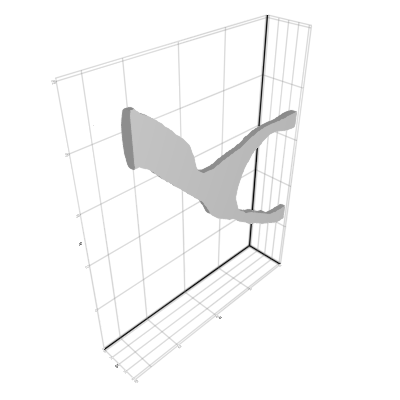

It:11 Obj:7.807485263578e9 Vol:0.067 ch:0.154
It:12 Obj:7.807485260663e9 Vol:0.067 ch:0.17
It:13 Obj:7.807485256115e9 Vol:0.067 ch:0.107
It:14 Obj:7.807485254334e9 Vol:0.067 ch:0.149
It:15 Obj:7.807485251696e9 Vol:0.067 ch:0.095
It:16 Obj:7.807485250524e9 Vol:0.067 ch:0.121
It:17 Obj:7.807485249241e9 Vol:0.067 ch:0.08
It:18 Obj:7.807485248492e9 Vol:0.067 ch:0.091
It:19 Obj:7.807485247538e9 Vol:0.067 ch:0.11
It:20 Obj:7.807485246781e9 Vol:0.067 ch:0.119


┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


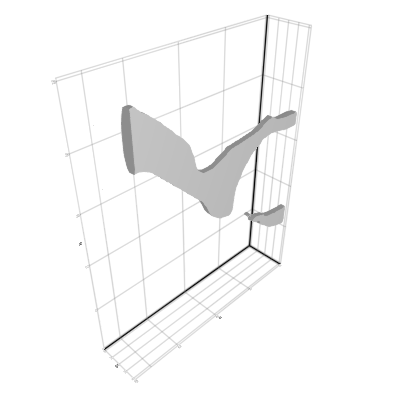

It:21 Obj:7.807485246008e9 Vol:0.067 ch:0.111
It:22 Obj:7.80748524514e9 Vol:0.067 ch:0.07
It:23 Obj:7.807485244419e9 Vol:0.067 ch:0.058
It:24 Obj:7.807485244104e9 Vol:0.067 ch:0.052
It:25 Obj:7.807485243807e9 Vol:0.067 ch:0.058
It:26 Obj:7.807485243532e9 Vol:0.067 ch:0.055
It:27 Obj:7.807485243431e9 Vol:0.067 ch:0.07
It:28 Obj:7.807485243148e9 Vol:0.067 ch:0.088
It:29 Obj:7.807485242682e9 Vol:0.067 ch:0.106
It:30 Obj:7.80748524224e9 Vol:0.067 ch:0.124


┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


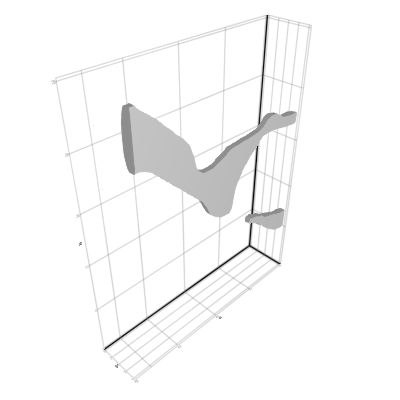

It:31 Obj:7.807485241659e9 Vol:0.067 ch:0.135
It:32 Obj:7.807485241062e9 Vol:0.067 ch:0.104
It:33 Obj:7.807485240556e9 Vol:0.067 ch:0.097
It:34 Obj:7.807485240048e9 Vol:0.067 ch:0.072
It:35 Obj:7.807485239485e9 Vol:0.067 ch:0.071
It:36 Obj:7.807485238771e9 Vol:0.067 ch:0.072
It:37 Obj:7.807485238297e9 Vol:0.067 ch:0.081
It:38 Obj:7.807485237714e9 Vol:0.067 ch:0.087
It:39 Obj:7.807485237278e9 Vol:0.067 ch:0.092


LoadError: [91mInterruptException:[39m

In [34]:
nely=size(v)[1]
nelx=size(v)[2]
nelz=size(v)[3]
# volfrac=1.0*sum(v)/length(v)*10*1.5
volfrac=0.3*sum(v)/length(v)
# volfrac=0.2
display(volfrac)
rmin=2
penal=3
maxIter=100
voxels=v
getProblem=madcat

xPhys,anim=topologyOptimization3dConstrained(nelx,nely,nelz,volfrac,rmin,penal,maxIter,getProblem,voxels);

# xPhys,anim=topologyOptimization3dMMA(nelx,nely,nelz,volfrac,rmin,penal,maxIter,getProblem,voxels);


# Concurrent

"nelx 25,nely 6,nelz 40, volfrac 0.24233333333333335"

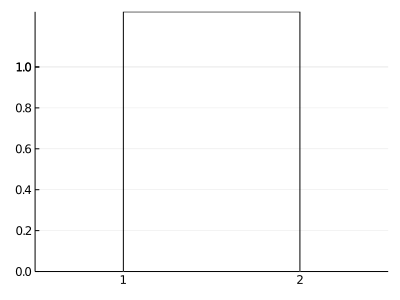

Mask 1 with density 0.5 occupies 55.03% of the macrostructure.
Mask 2 with density 0.5 occupies 44.97% of the macrostructure.
1 Obj:3314.6 Macro_Vol:0.1 Micro_Vol:[0.95, 0.95] Macro_ch:0.1 Micro_ch:[0.05, 0.05]
2 Obj:9.158166783787e10 Macro_Vol:0.13 Micro_Vol:[0.92, 0.92] Macro_ch:NaN Micro_ch:[0.05, 0.05]
3 Obj:1.0222531123548e11 Macro_Vol:0.15 Micro_Vol:[0.88, 0.88] Macro_ch:NaN Micro_ch:[0.05, 0.05]
4 Obj:1.1499906315843e11 Macro_Vol:0.17 Micro_Vol:[0.85, 0.85] Macro_ch:NaN Micro_ch:[0.05, 0.05]
5 Obj:1.3052581879928e11 Macro_Vol:0.19 Micro_Vol:[0.81, 0.81] Macro_ch:NaN Micro_ch:[0.05, 0.05]


LoadError: [91mInterruptException:[39m

In [57]:
nelx=size(v)[1]
nely=size(v)[2]
nelz=size(v)[3]
volfrac=1.0*sum(v)/length(v)

si=20

display("nelx $nelx,nely $nely,nelz $nelz, volfrac $volfrac")


# wing
Macro_struct = [nely/10, nelx/10, nelz/10, nely, nelx, nelz, [volfrac,volfrac],2,0.2];
#[length,width,height,nelx,nely,nelz,[volfrac_FM,volfrac],rmin,change]
Micro_struct = [0.1, 0.1, 0.1, si, si, si, 0.5,3,0.2];
#[length,width,height,nelx,nely,nelz,volfrac,rmin,change]

penal = 3;
saveItr=5;
θ=2
maxloop=50
prob=madcat
fabric=true
mgcg=[false,true]
voxels=v


Macro_xPhys6,Micro_xPhys6,Macro_masks6,Micro_Vol6,DHs6=MultiConTop3DU(θ,Macro_struct, Micro_struct,prob, penal,saveItr,maxloop,fabric,mgcg,voxels);


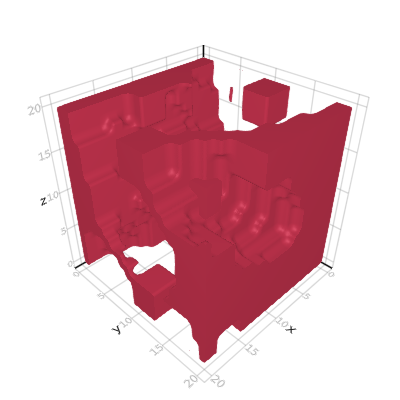

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135
┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


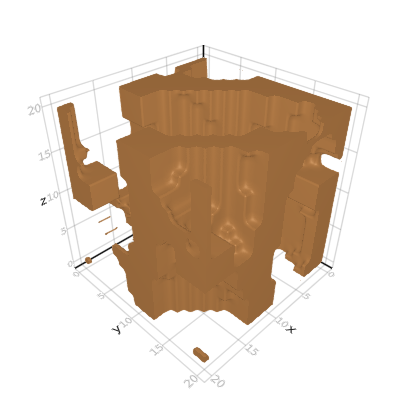

In [48]:
t=:dark
# theme(t);
cschemeList=[]
append!(cschemeList,[:white])
for i=1:θ
    append!(cschemeList,[palette(t)[i]])
end
cscheme=ColorGradient(cschemeList)

Micro_xPhys=Micro_xPhys6

n=1
for i=1:θ
    temp=copy(Micro_xPhys[i])
    # display(sum(Micro_xPhys[i]))
    temp[Micro_xPhys[i].<0.8].=0.0
    temp[Micro_xPhys[i].>=0.8].=i
    scene = Scene(resolution = (400, 400))
    scene= volume!(repeat(temp,n,n,n),colorrange=(0.0, θ), algorithm = :iso,isorange = 0.2, isovalue = i,colormap=cscheme)
    display(scene)
#     save("./img/Micro_xPhys3UArray_10_$(i).png",scene)
end

In [58]:
AbstractPlotting.inline!(false)
n=1
i=2
temp=copy(Micro_xPhys[i])
# display(sum(Micro_xPhys[i]))
temp[Micro_xPhys[i].<0.9].=0.0
temp[Micro_xPhys[i].>=0.9].=i
scene = Scene(resolution = (400, 400))
scene= volume!(repeat(temp,n,n,n),colorrange=(0.0, θ), algorithm = :iso,isorange = 0.2, isovalue = i,colormap=cscheme)
display(scene)

GLMakie.Screen(...)